<a href="https://colab.research.google.com/github/HalyshAnton/IT-Step-Pyton-AI/blob/main/module1/electricity_meter_readings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [ ]:
img = cv2.imread("/content/electricity meter.jpg")
img = cv2.resize(img, (512, 512))

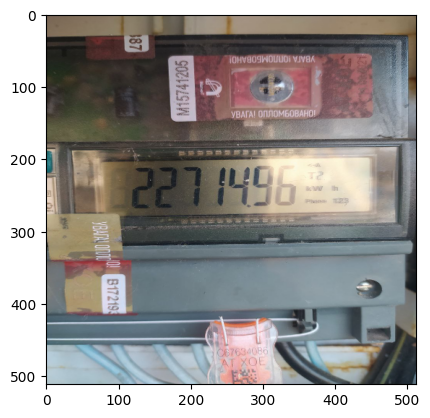

In [ ]:
plt.imshow(img[:, :, ::-1])

In [ ]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_black = np.array([0, 0, 0])
upper_black = np.array([30,255,255])

mask = cv2.inRange(hsv, lower_black, upper_black)
#mask = cv2.dilate(mask, (3, 3), iterations=5)

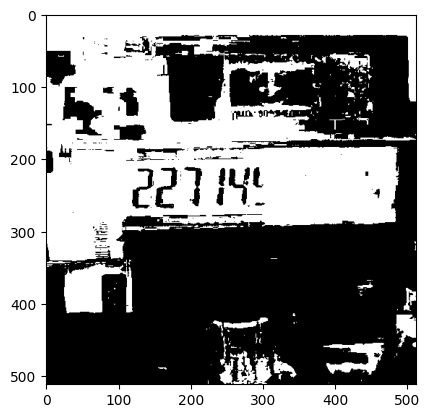

In [ ]:
plt.imshow(mask, cmap="gray")

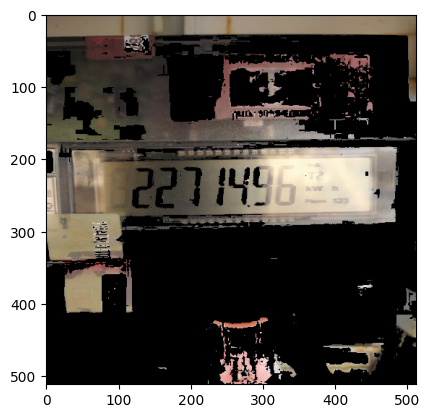

In [ ]:
new_img = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(new_img[:, :, ::-1])

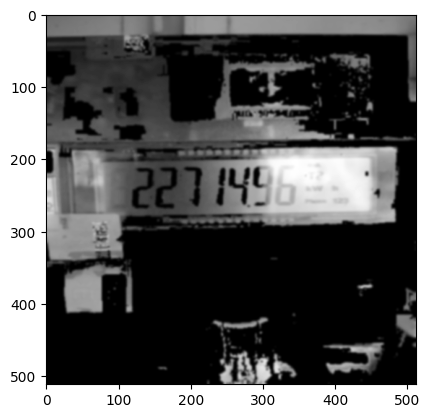

In [ ]:
new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(new_img, (7, 7), 0)
#blurred = cv2.bilateralFilter(blurred, 5, sigmaColor=50, sigmaSpace=50)
plt.imshow(blurred, cmap="gray")

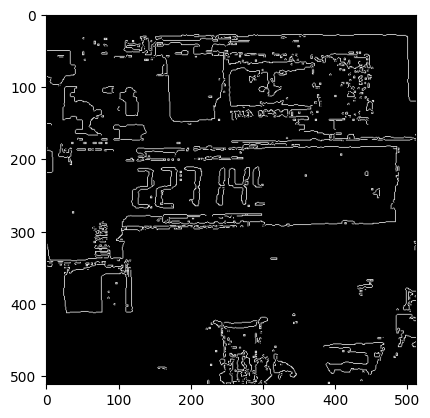

In [ ]:
edged = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,7,3)
edged = cv2.Canny(mask, 100, 120, 255)
plt.imshow(edged, cmap="gray")

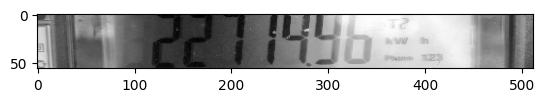

In [ ]:
def func(cnt, mask=mask):
  x, y, w, h = cv2.boundingRect(cnt)
  roi = mask[y : y + h, x : x + w]

  return np.sum(roi)

cnts, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# sort contours by area, and get the largest
cnt = max(cnts, key=cv2.contourArea)

x, y, w, h = cv2.boundingRect(cnt)
roi = img[y : y + h, :]

roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
plt.imshow(roi, cmap="gray")

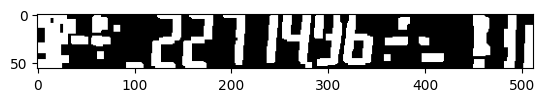

In [ ]:
blurred = cv2.bilateralFilter(roi, 5, 30, 60)
edged = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 9, 3)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
eroded = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel, iterations=2)
eroded = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, kernel, iterations=2)
eroded = cv2.dilate(eroded, kernel)

plt.imshow(eroded, cmap="gray")

In [ ]:
cnts, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
digits_cnts = []
canvas = eroded

for cnt in cnts:
    (x, y, w, h) = cv2.boundingRect(cnt)
    if h > 40:
        digits_cnts += [cnt]

digits_cnts = sorted(digits_cnts, key=lambda cnt: cv2.boundingRect(cnt)[0])

xs = np.array(list(map(lambda cnt: cv2.boundingRect(cnt)[0], digits_cnts)))
dists = np.diff(xs)

In [ ]:
start, end = np.argsort(dists)[-2:]

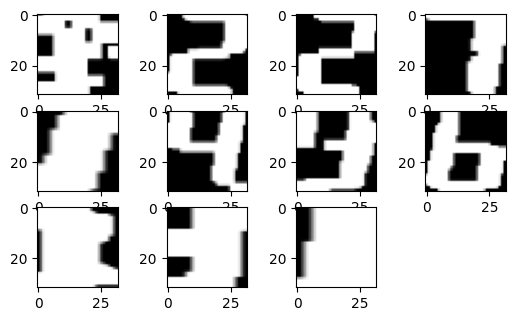

In [ ]:
for i in range(len(digits_cnts)):
  (x, y, w, h) = cv2.boundingRect(digits_cnts[i])

  region = eroded[y : y + h, x : x + w]
  region = cv2.resize(region, (32, 32))
  plt.subplot(4, 4, i+1)
  plt.imshow(region, cmap="gray")